# TOPIC:  Buiding an MLP Classifier Using the Sequential API

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)
print(keras.__version__)

2.1.0
2.2.4-tf


# 1/ Loading the Fashion_MNIST dataset using Keras

In [2]:
# load the dataset and split it into 2 sets
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

# provide 10 class names for the dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [3]:
# get general info of the datasets
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

print('------------')
print(X_train_full.dtype)
print(y_train_full.dtype)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
------------
uint8
uint8


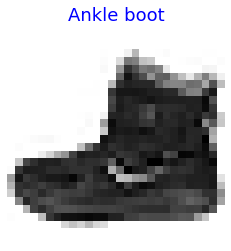

In [4]:
def display_image(X_one_row,class_name):
    img = X_one_row.reshape(28,28)
    plt.imshow(img,cmap='binary')
    plt.axis('off')
    plt.title(class_name,fontsize=18,color='blue')
    plt.show()


# Display the first item
X_first_row = X_train_full[0]
display_image(X_first_row,class_names[y_train_full[0]])

# 2/ Processing data

In [5]:
# Create the validation set and new training test from the full training set, and normalize them in range[0,1]
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]


# 3/ Building an Classifier Using the Sequential API

In [6]:
# Create the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),  # converting each input to a 1D array
    keras.layers.Dense(300,activation='relu'),  # 300 neurons, using ReLU activation function.
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


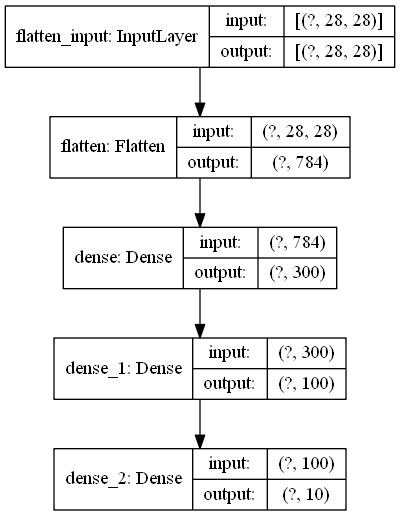

In [7]:
keras.utils.plot_model(model, show_shapes=True)

In [8]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy",  # used for sparse labels (0-9) and the classes are exclusive
              optimizer="sgd",          # Stochastic Gradient Descent
              metrics=["accuracy"])


In [9]:
# Training and evaluating the model
history = model.fit(X_train,y_train,epochs=30, validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 2s 43us/sample - loss: 0.7119 - accuracy: 0.7684 - val_loss: 0.5374 - val_accuracy: 0.8002

# 4/ Evaluating the Performance of the Model

### 4.1/ On the training and validation sets

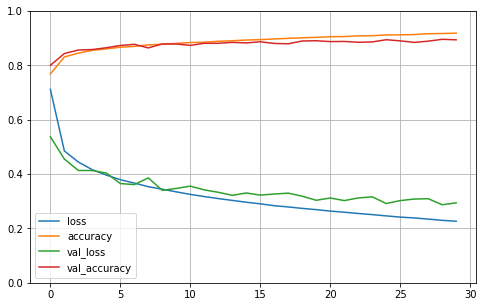

,loss,accuracy,val_loss,val_accuracy
29,0.226438,0.918455,0.294243,0.894


In [10]:
# plot the training curves


history_df = pd.DataFrame(history.history)
history_df.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

display(history_df.iloc[[-1]])

- Both training and validation accuracy is increasing, while the losses are decreasing.
- The validation curves are close to the training curves, which means that there is NOT TOO MUCH OVER-FITTING.

### 4.2/ On the testing set

In [11]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 36us/sample - loss: 57.4387 - accuracy: 0.8514


[57.43871839263058, 0.8514]

# 5/ Using the Model to Make Predictions

The first 5 items are ['Ankle boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt']
The first 5 items have been predicted to be: ['Ankle boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt']


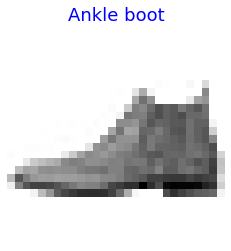

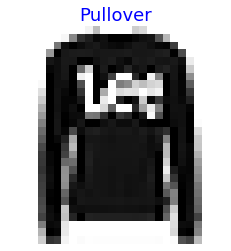

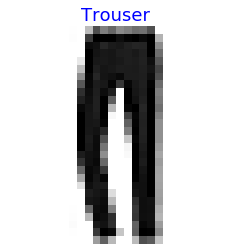

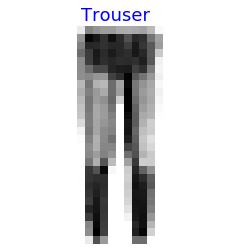

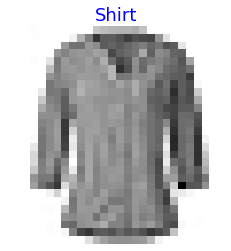

In [12]:
X_new = X_test[:5]
y_pred = model.predict_classes(X_new)
print(f'The first 5 items are {np.array(class_names)[y_test[:5]]}')
print(f'The first 5 items have been predicted bto be: {np.array(class_names)[y_pred]}')
for i in range(5):
    display_image(X_new[i],class_names[y_pred[i]])